In [45]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [46]:
def replace_carType(carType):
    try:
        types = ['van', 'regcar', 'sportuv', 'sportcar', 'stwagon', 'truck']
        return types.index(carType)
    except ValueError:
        return carType


def replace_fuelType(fuelType):
    try:
        types = ['cng', 'methanol', 'electric', 'gasoline']
        return types.index(fuelType)
    except ValueError:
        return fuelType


In [47]:
path = 'trainingData.csv'
df = read_csv(path)

for col in df.columns[5:11]:
    df[col] = df[col].apply(replace_carType)
for col in df.columns[11:17]:
    df[col] = df[col].apply(replace_fuelType)

In [48]:
df.drop(['id'], axis=1, inplace=True)
X, y = df.values[:, 1:], df.values[:, 0]

print(X)

[[1 0 0 ... 0.1 1.0 1.0]
 [1 1 1 ... 0.3 1.0 1.0]
 [1 0 0 ... 0.3 1.0 1.0]
 ...
 [1 1 0 ... 0.7 0.1 0.1]
 [0 1 0 ... 0.1 1.0 1.0]
 [0 1 1 ... 0.3 1.0 1.0]]


In [49]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3051, 69) (1503, 69) (3051,) (1503,)


In [51]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(6, activation='softmax'))


In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                700       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


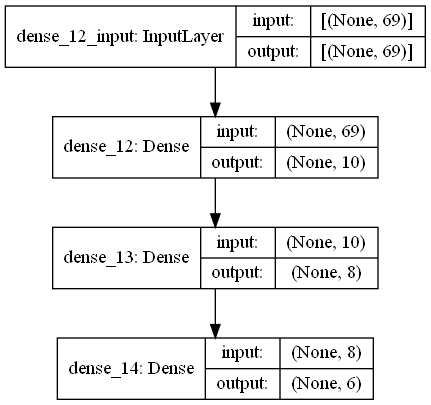

In [53]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)

In [55]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


Test Accuracy: 0.324
